In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

En este ejercicio importaremos un solo texto para realizar un análisis de sentimiento mediante Sentiment Intensity Analyzer y así determinar en qué grado la intención del texto es posisitiva, negativa o neutra.

Para ello haremos un preprocesamiento del texto y separaremos en elementos individuales todas sus palabras y signos de puntuación. Una vez separados todos los elementos, reduciremos su extensión mediante las siguientes tres herramientas:

    - Stopwords
    - WordNetLemmatizer
    - PorterStemmer

Por otro lado, también visualizaremos la información con histogramas y gráficos del tipo Word Cloud.

Finalmente, con el texto preprocesado podremos aplicar un análisis de sentimiento con las siguientes herramientas:

    - Sentiment Intensity Analyzer
    - Text Blob
    
En primer lugar, introducimos el texto que queremos analizar y consultamos el número de caracteres.

In [19]:
text = """And the so-called real world will not discourage you from operating on your default settings, because the so-called real world of men and money and power hums merrily along in a pool of fear and anger and frustration and craving and worship of self. Our own present culture has harnessed these forces in ways that have yielded extraordinary wealth and comfort and personal freedom. The freedom all to be lords of our tiny skull-sized kingdoms, alone at the centre of all creation. This kind of freedom has much to recommend it. But of course there are all different kinds of freedom, and the kind that is most precious you will not hear much talk about much in the great outside world of wanting and achieving…. The really important kind of freedom involves attention and awareness and discipline, and being able truly to care about other people and to sacrifice for them over and over in myriad petty, unsexy ways every day. That is real freedom. That is being educated, and understanding how to think. The alternative is unconsciousness, the default setting, the rat race, the constant gnawing sense of having had, and lost, some infinite thing."""
text

'And the so-called real world will not discourage you from operating on your default settings, because the so-called real world of men and money and power hums merrily along in a pool of fear and anger and frustration and craving and worship of self. Our own present culture has harnessed these forces in ways that have yielded extraordinary wealth and comfort and personal freedom. The freedom all to be lords of our tiny skull-sized kingdoms, alone at the centre of all creation. This kind of freedom has much to recommend it. But of course there are all different kinds of freedom, and the kind that is most precious you will not hear much talk about much in the great outside world of wanting and achieving…. The really important kind of freedom involves attention and awareness and discipline, and being able truly to care about other people and to sacrifice for them over and over in myriad petty, unsexy ways every day. That is real freedom. That is being educated, and understanding how to th

In [20]:
print('El texto original dispone de', len(text), 'caracteres')

El texto original dispone de 1147 caracteres


Acto seguido usamos la herramienta 'word_tokenize' para obtener una lista de todas las palabras y signos de puntuación como elementos individuales.

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize

tokens = word_tokenize(text.lower())

Ahora consultamos el número total de tokens en los que se ha traducido el texto y hacemos un diagrama de barras con la frecuencia de los 30 elementos más frecuentes.


El número total de tokens del texto original es de: 216


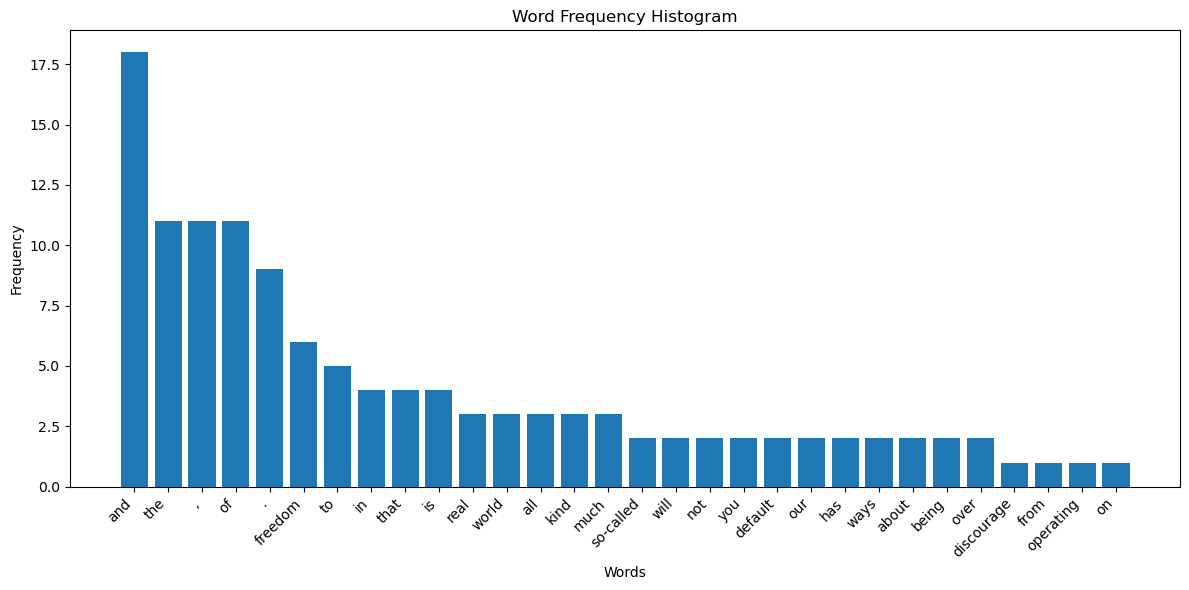

In [22]:
from collections import Counter

print('\nEl número total de tokens del texto original es de:', len(tokens))

word_counts = Counter(tokens)

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_word_counts)

plt.figure(figsize=(12, 6))
plt.bar(words[:30], counts[:30])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vemos cómo las palabras más repetidas son comprensiblemente artículos como 'the', conjunciones como 'and', preposiciones o signos de puntuación, verbos auxiliares como 'is' o pronombres como 'that'.

Para reducir este tipo de palabras que posiblemente no aporten mucho al texto a nivel de información, usamos la herramienta Stopwords para eliminarlas del texto.

In [23]:
from nltk.corpus import stopwords

filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

print('El número total de tokens tras aplicar Stopwords es de:', len(filtered_tokens))

El número total de tokens tras aplicar Stopwords es de: 117


Tan solo mediante Stopwords hemos reducido en casi 100 elementos el texto. Consultamos ahora mediante un histograma la frecuencia después de haberlo procesado.

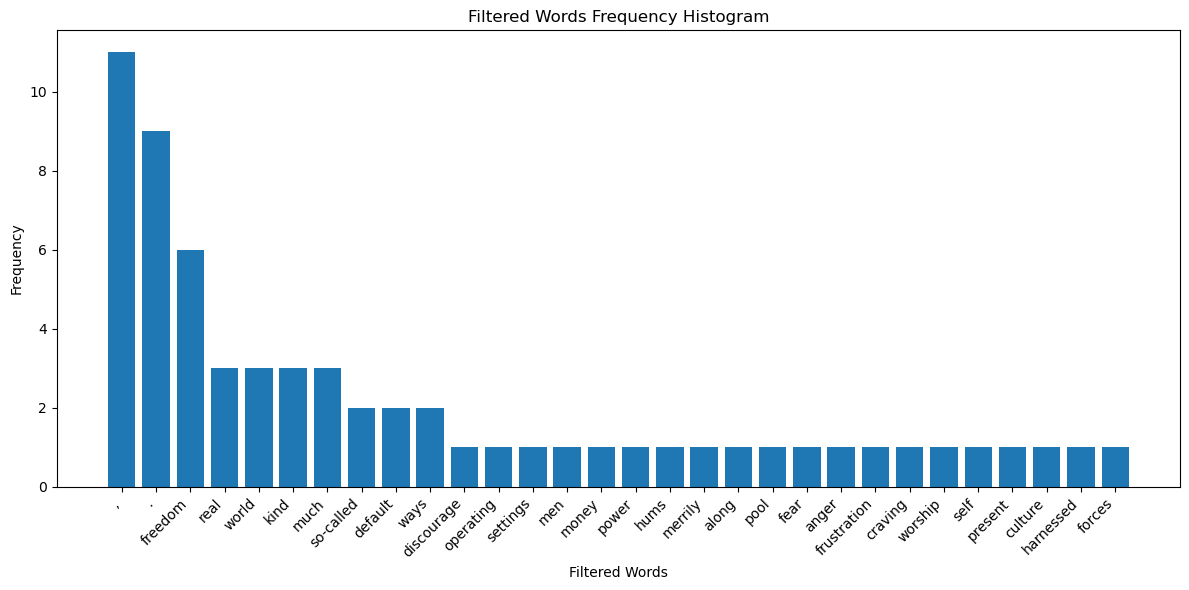

In [24]:
filtered_word_counts = Counter(filtered_tokens)

filtered_sorted_word_counts = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)
filtered_words, filtered_counts = zip(*filtered_sorted_word_counts)

plt.figure(figsize=(12, 6))
plt.bar(filtered_words[:30], filtered_counts[:30])
plt.xlabel('Filtered Words')
plt.ylabel('Frequency')
plt.title('Filtered Words Frequency Histogram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vemos conclaridad que Stopwords ha eliminado las preposiciones, artículos, pronombres y conjunciones que comentabámos más arriba, por lo que parece que tiende a quedarse con verbos, nombres, adjetivos y adverbios.

Consultamos de nuevo el texto para ver esta versión reducida y su número de caracteres.

In [36]:
processed_text_stopwords = ' '.join(filtered_tokens)

print("Stopwords Text:")
print(processed_text_stopwords)
print('\nEl número total de caracteres es de:', len(processed_text_stopwords))

Stopwords Text:
so-called real world discourage operating default settings , so-called real world men money power hums merrily along pool fear anger frustration craving worship self . present culture harnessed forces ways yielded extraordinary wealth comfort personal freedom . freedom lords tiny skull-sized kingdoms , alone centre creation . kind freedom much recommend . course different kinds freedom , kind precious hear much talk much great outside world wanting achieving… . really important kind freedom involves attention awareness discipline , able truly care people sacrifice myriad petty , unsexy ways every day . real freedom . educated , understanding think . alternative unconsciousness , default setting , rat race , constant gnawing sense , lost , infinite thing .

El número total de caracteres es de: 765


Comprobamos que el texto todavía es comprensible, aunque se perciben algunos errores, como el cambio de sentido de la primera frase al eliminar la palabra 'not' en 'not discourage'.

A continuación aplicamos la herramienta lemmatizer, que reduce algunas palabras a una forma más corta, consultamos el texto y su número de tokens.

In [37]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

processed_text = ' '.join(lemmatized_tokens)

print("Lemmatized Text:")
print(processed_text)
print('\nEl número total de caracteres es de:', len(processed_text))
print('El número total de tokens es de', len(lemmatized_tokens))

Lemmatized Text:
so-called real world discourage operating default setting , so-called real world men money power hum merrily along pool fear anger frustration craving worship self . present culture harnessed force way yielded extraordinary wealth comfort personal freedom . freedom lord tiny skull-sized kingdom , alone centre creation . kind freedom much recommend . course different kind freedom , kind precious hear much talk much great outside world wanting achieving… . really important kind freedom involves attention awareness discipline , able truly care people sacrifice myriad petty , unsexy way every day . real freedom . educated , understanding think . alternative unconsciousness , default setting , rat race , constant gnawing sense , lost , infinite thing .

El número total de caracteres es de: 757
El número total de tokens es de 117


Si bien el número de tokens es el mismo, ya que no se ha alterado el número de elementos sino tan solo su composición, vemos que apenas se ha reducido el número de caracteres, pues esta herramienta tan solo ha eliminado los plurales de las palabras 'settings', 'forces' y 'ways' entre otras.

Ahora que tenemos un primer texto procesado con Stopwords y Lemmatizer, en lugar de un histograma, podemos ver la fracuencia de las palabras con un gráfico Word Cloud.

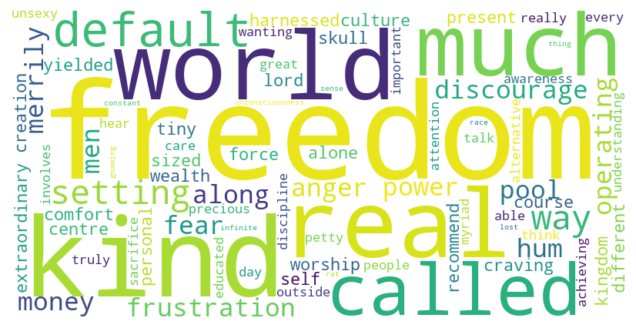

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Una vez eliminados estos plurales, podemos usar otra herramienta que también lleva algunas palabras a su raíces. Procedemos a aplicar el Porter Stemmer, a imprimir el text procesado y a contar el número de caracteres y tokens.

In [28]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

processed_text_stem = ' '.join(stemmed_tokens)

print("Stemmed Text:")
print(processed_text_stem)
print('\nEl número total de caracteres es de:', len(processed_text_stem))
print('El número total de tokens es de', len(stemmed_tokens))

Stemmed Text:
so-cal real world discourag oper default set , so-cal real world men money power hum merrili along pool fear anger frustrat crave worship self . present cultur har forc way yield extraordinari wealth comfort person freedom . freedom lord tini skull-siz kingdom , alon centr creation . kind freedom much recommend . cours differ kind freedom , kind preciou hear much talk much great outsid world want achieving… . realli import kind freedom involv attent awar disciplin , abl truli care peopl sacrific myriad petti , unsexi way everi day . real freedom . educ , understand think . altern unconsci , default set , rat race , constant gnaw sens , lost , infinit thing .

El número total de caracteres es de: 666
El número total de tokens es de 117


En este caso sí que notamos una reducción de 100 caracteres. Entre otras cosas, esta herramienta elimina la congujación de los verbos, como por ejemplo de 'called' a 'cal' o 'operating' a 'oper'. También algunos errores, como por ejemplo la palabra 'achieving' no ha sido reducida a causa de que le seguían tres puntos suspensivos '...'.

Para acabar de hacernos una idea de esta última edición del texto, consultamos de nuevo su Word Cloud.

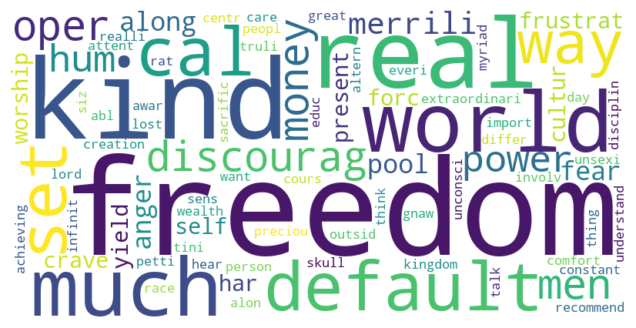

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(processed_text_stem)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ahora que ya disponemos el texto a una versión lo suficientemente reducida, procedemos a aplicar el análisis de sentimiento.

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

score = sia.polarity_scores(processed_text_stem)

score

{'neg': 0.063, 'neu': 0.524, 'pos': 0.413, 'compound': 0.9942}

Esta puntuación lo que nos indica es el grado de presencia en una escala del 0 al 1 de cada una de los tres posibles sentimientos. Por otro lado, también está el valor 'compound' que nos proporciona un valor general que puede ir del -1, si es en un alto grado negativo, al 1, en caso de ser positivo. 

En este caso, el texto que le hemos proporcionado nos lo ha puntuado como neutral aunque muy cerca también de ser positivo, pero en absoluto negativo, ya que como 'compound' puntúa un 0.99, probablemente por la ausencia de palabras asociadas con sentimientos negativos.

Podemos continuar para acabar de obtener un resultado y consultar el nivel de subjetividad del texto mediante TextBlob.

In [31]:
from textblob import TextBlob

blob = TextBlob(processed_text_stem)

subjectivity_score = blob.sentiment.subjectivity

print(f"Subjectivity Score: {subjectivity_score}")

Subjectivity Score: 0.47564102564102567


Parece ser que ambas puntuaciones coinciden, pues podríamos decir que una subjetividad del 50% es una subjetividad neutral, por lo que concordaría con la puntuación de la neutralidad de la puntuación anterior.

Al mismo tiempo, no es en absoluto negativa sino más bien positiva. Comprobamos esta cuestión por los gráficos que hemos ido consultando hasta el momento, pues la palabras con mayor presencia e importancia son aquellas asociadas a sentimientos positivos como 'Freedom'.

Como conclusión y después de haber leído el texto original, podemos decir que en este caso es difícil de categorizar. No obstante, considero que acierta en que la intención del autor no se expresa como una opinión, sino como un diagnóstico o una descripción. En este mismo sentido, también estaría de acuerdo con que es positivo, pues al mismo tiempo que el autor hace un diagnóstico, este diagnóstico es positivo y alentador.

Como colofón, la utilidad de este tipo de herramientas de clasificación por análisis de sentimientos, entiendo que adquieren más sentido cuando se aplican a grandes números de opiniones sobre determinado evento, producto, servicio, para así hacernos una idea de la aceptación o rechazo que puedan estar causando y no tanto a textos con autoría como el que hemos analizado.